# Milestone2 


## Names & ID
* Ammar Riyadh (28222354)
* Jagdeep Dhillon (18226282)

## Table of Contents
* 1. Introduction
* 2. Original Dataset
* 3. Method Chaining
* 4. Exploratory Data Analysis
* 5. Analysis
  - 5.1 Research Questions 
  - 5.2 Results
* 6. Conclusion

## Introduction
The "impacts.csv" is a dataset created by NASA, which includes a list of possible asteroid impacts, and characteristics of said asteroid such as probability, diameter, velocity, etc. NASA has gathered this information through their "Sentry" system, which is an automated collision monitoring system that scans through a catalog of asteroids to find possibilities of impact over the next 100 years. Our goal with this dataset is to do an Exploratory Data Analysis to help further our understanding. This will also help us answer any questions we may have on this dataset.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Original Dataset
The DataFrame below includes information about possible asteriod impacts on earth and asteriod parameters. The dataset includes:
- Columns named "Period Start and "Period End" show the initiation and ending of the risk factor.
- Possible Impacts refers to a percentage of probability for impact
- Asteriod Magnitude refers to the visual brightness relative to the earth , the higher the magnitude the less brightness and visibility.
- Palermo Scale utilizes an in depth scale to quanitfy level of concern for future potential impacts.
- Torino Scale indicates the impact's severity dedicated to notify the public.


In [3]:
df = pd.read_csv ('../../data/raw/impacts.csv')
df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


## Method Chaining
- Through this method chaining I was able to get rid of all null values, assign units to parameters  , and organize the data. I have renamed the colums for further description. I have also dropped the maximum torino scale because most of the values were 0 and would reproduce no plot.
- I have used the load_and_process function. Calling upon this function will apply my method chaining to the dataframe.


In [4]:
df = (pd.read_csv('../../data/raw/impacts.csv')
      .dropna() 
      .rename(columns={"Period Start": "Risk Period Start", "Period End": "Risk Period End", "Object Name": "Asteroid Name"})
      .rename(columns={"Asteroid Velocity": "Asteroid Velocity (km/s)", "Asteroid Magnitude": "Asteroid Magnitude (m)"})
      .drop(['Maximum Torino Scale'], axis=1)
      .loc[0:450]
      .sort_values(by='Risk Period Start', ascending=True)
      .reset_index(drop=True) 
    )
df

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (m),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2008 EK68,2017,2115,315,5.000000e-06,7.43,29.8,0.004,-7.60,-8.87
2,2012 BP123,2017,2115,228,5.900000e-07,4.60,27.1,0.013,-7.24,-8.11
3,2015 HW182,2017,2115,174,5.700000e-08,10.76,25.2,0.031,-6.69,-7.17
4,2008 EM68,2017,2115,1144,1.300000e-05,14.54,27.8,0.010,-5.31,-5.65
...,...,...,...,...,...,...,...,...,...,...
446,2014 QF33,2076,2076,1,3.400000e-08,23.29,23.7,0.060,-6.63,-6.63
447,2014 FX32,2076,2108,3,3.100000e-06,9.05,25.1,0.033,-5.71,-5.71
448,2016 RR1,2076,2113,27,2.000000e-04,6.75,27.8,0.009,-5.42,-5.64
449,2004 VZ14,2076,2114,4,2.100000e-06,15.26,25.3,0.030,-5.92,-6.39


In [4]:
from scripts import project_functions
df = project_functions.load_and_process('../../data/raw/impacts.csv')
df

,Asteroid Name,Risk Period Start,Risk Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity (km/s),Asteroid Magnitude (m),Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2008 EK68,2017,2115,315,5.000000e-06,7.43,29.8,0.004,-7.60,-8.87
2,2012 BP123,2017,2115,228,5.900000e-07,4.60,27.1,0.013,-7.24,-8.11
3,2015 HW182,2017,2115,174,5.700000e-08,10.76,25.2,0.031,-6.69,-7.17
4,2008 EM68,2017,2115,1144,1.300000e-05,14.54,27.8,0.010,-5.31,-5.65
...,...,...,...,...,...,...,...,...,...,...
446,2014 QF33,2076,2076,1,3.400000e-08,23.29,23.7,0.060,-6.63,-6.63
447,2014 FX32,2076,2108,3,3.100000e-06,9.05,25.1,0.033,-5.71,-5.71
448,2016 RR1,2076,2113,27,2.000000e-04,6.75,27.8,0.009,-5.42,-5.64
449,2004 VZ14,2076,2114,4,2.100000e-06,15.26,25.3,0.030,-5.92,-6.39


## Exploratory Data Analysis 

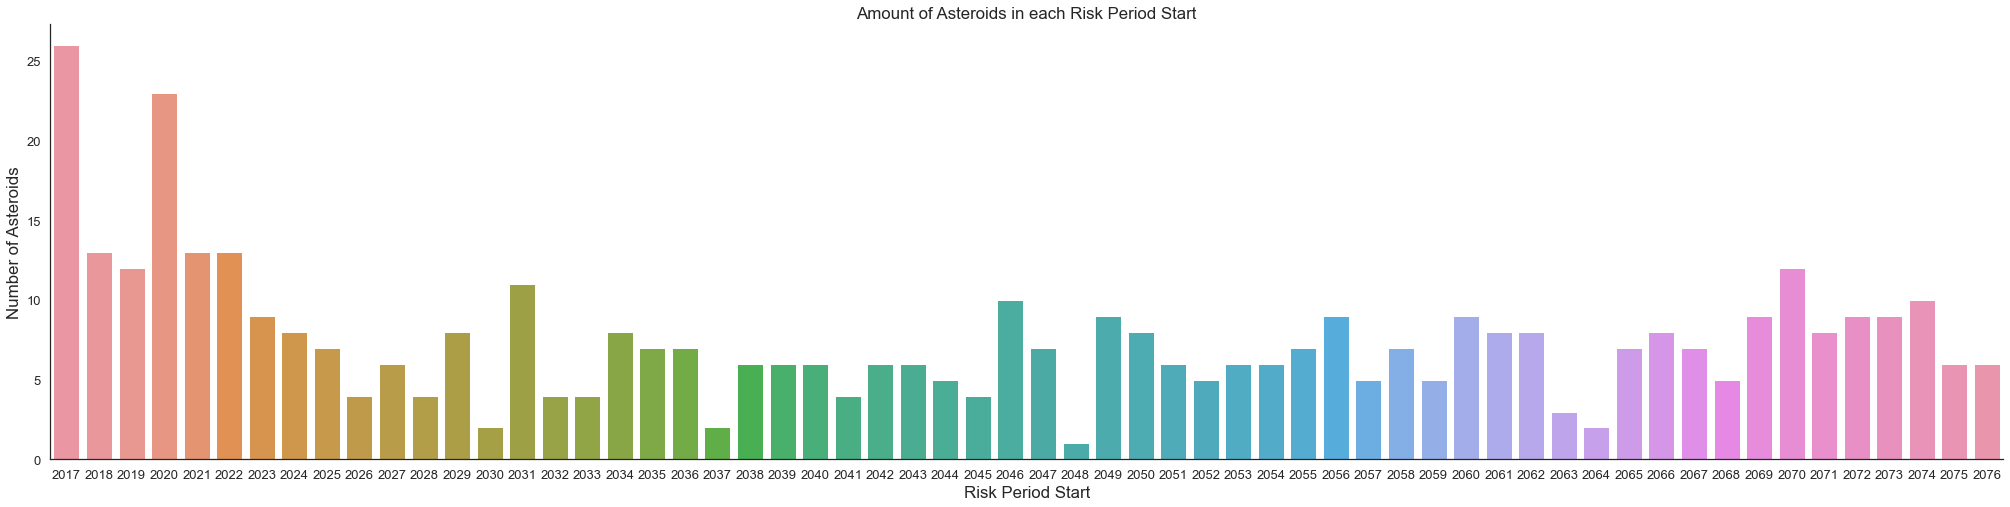

In [6]:
sns.set_theme(style="white",font_scale=1.4)
fig, x=plt.subplots(figsize=(35,8))
x = sns.countplot(x="Risk Period Start", data=df)
plt.title('Amount of Asteroids in each Risk Period Start')
x.set(ylabel='Number of Asteroids')
plt.tick_params(labelsize=13)
sns.despine()
plt.show()

### Observations
In this part , I have used the count plot to demonstrate a branch of my data. I can see that the data is scattered throughout the diagram with no certain relationship between the two inputs. The year 2017 showed the highest number of asteriods in the initial risk period. The lowest number of asteriods (less than 5) is seen at the year 2048. The graph then fluctuates throughout the years.

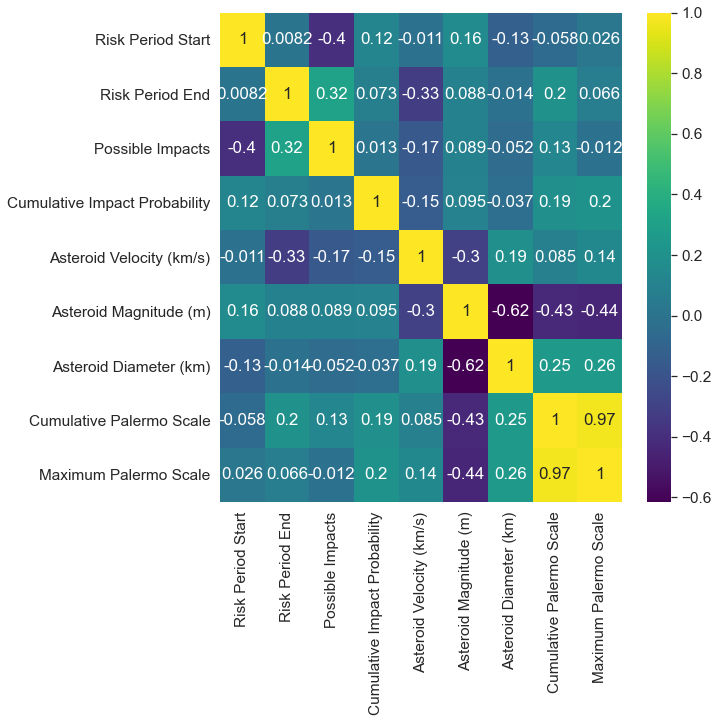

In [7]:
fig, x=plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

### Observations 
- The heat map shows the correlation between the variables on each axis and the key on the right hand side of the image shows the correlation range. 
- Value closer to 0 such as risk period end and risk period start (0.0082) have no linear trend between the two variables
- Value closer to 1 such as maxmium palermo scale and cumulative palermo scale (0.97) have positive correlation (as one increased so does the other)
- value closer to -1 such as Cumulative Palermo Scale and Risk Period Start (-0.058) demonstrate that as one variable decreases another increases and vice versa
- yellow squares are all 1 because those squares are correlating each variable to itself 

[Text(0.5, 1.0, 'Cumulative Impact Probability vs Possible Impacts')]

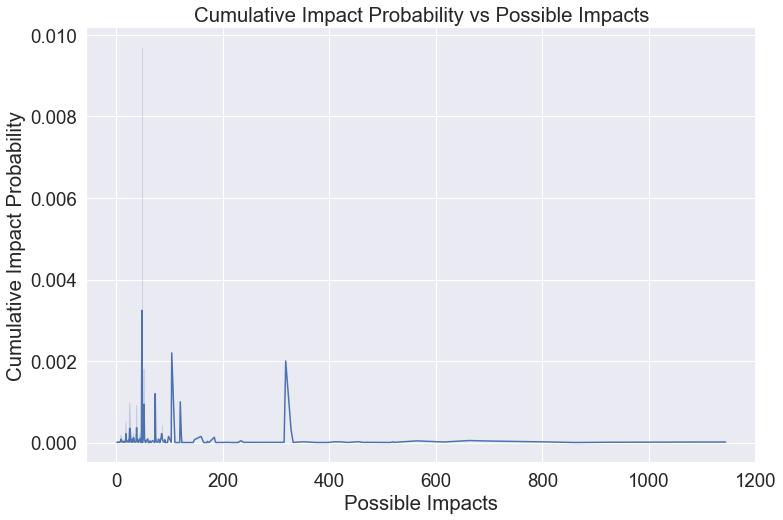

In [7]:
sns.set_theme(font_scale = 1.7)
plt.subplots(figsize=(12,8))
graph1 = sns.lineplot(x = 'Possible Impacts', y = 'Cumulative Impact Probability', data = df)
graph1.set(title= 'Cumulative Impact Probability vs Possible Impacts')


### Observations
This lineplot shows the relation between the number of possible impacts and the Cumulative Impact Probability. Other than an outlier just below 0.010, the rest of the data stays in between 0.000 and 0.004. Looking at this graph, I can conclude that even if the number of possible impacts increases, the cumulative impact probablity stays the same for the most part.

## Analysis 

### Research Questions
* Question 1 : What are the most common parameters that define an asteriod?
* Question 2 : What factors of our dataset affect the probability of an impact occurring?

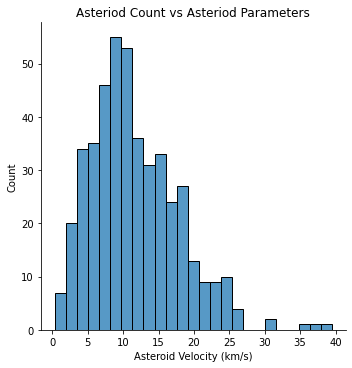

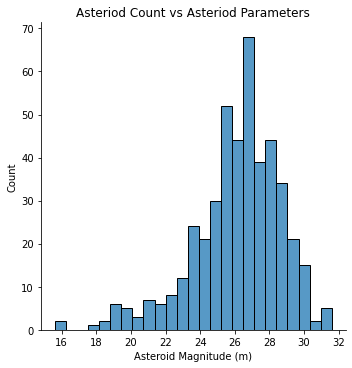

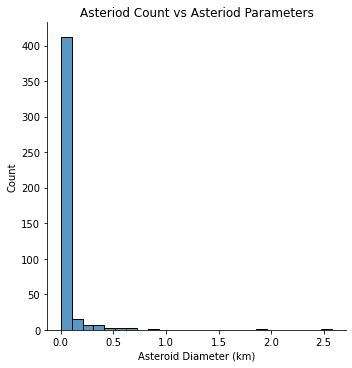

In [5]:
sns.displot(x = 'Asteroid Velocity (km/s)', data=df, bins = 25)
plt.title('Asteriod Count vs Asteriod Parameters')
sns.displot(x = 'Asteroid Magnitude (m)', data=df, bins = 25)
plt.title('Asteriod Count vs Asteriod Parameters')
sns.displot(x = 'Asteroid Diameter (km)', data=df, bins = 25)
plt.title('Asteriod Count vs Asteriod Parameters')
sns.despine()
plt.show()

### Observations
These plots demonastrate relationships between asteriod counts and their relative parameters. We can see that the smaller the asteriod , the higher the count. Moreover , asteriod magnitudes of the range 25-30 show the highest counts.


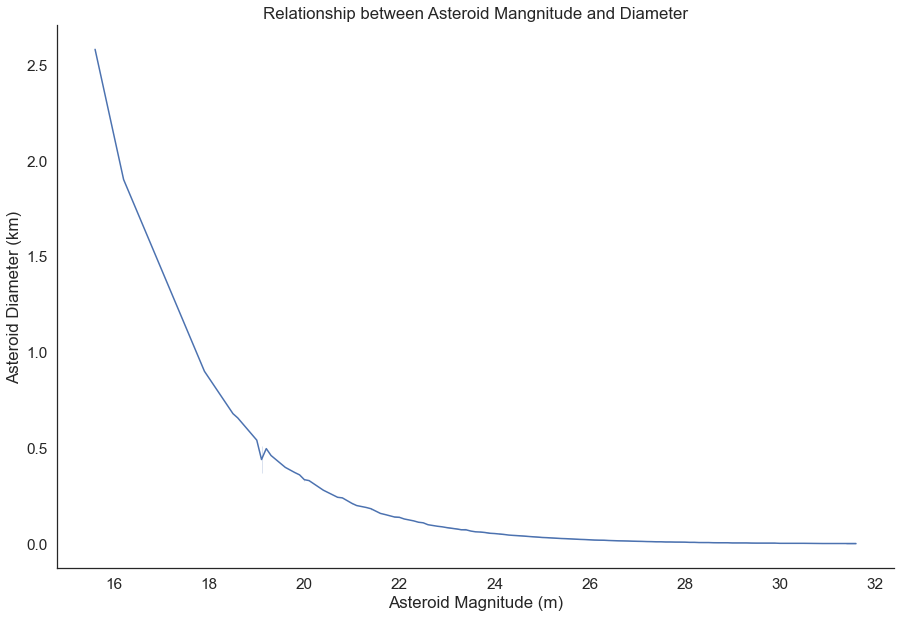

In [6]:
sns.set_theme(style="white",font_scale=1.4)
fig, x=plt.subplots(figsize=(15,10))
sns.lineplot(x="Asteroid Magnitude (m)", y="Asteroid Diameter (km)",  data=df, palette="rocket")
plt.title('Relationship between Asteroid Mangnitude and Diameter')
sns.despine()
plt.show()

### Observations
The graph decreases exponentially. In this plot , we can see the relationship between an asteriods diameter and magnitude. The higher the diamater the lower the magnitude of the asteriod. These parameters demonstrate and inverse relationship in our data. In other words , the wider the asteriod is in shape , the more visible and bright the asteriod is in relative to the earth. 

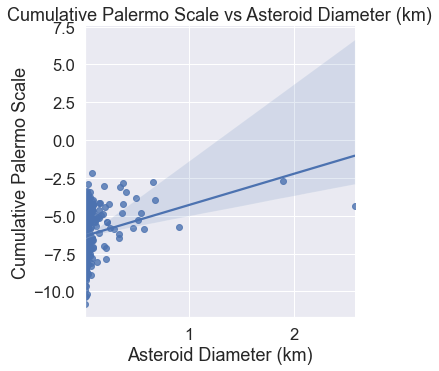

In [5]:
sns.set_theme(font_scale = 1.5)
graph2 = sns.lmplot(x = 'Asteroid Diameter (km)', y = 'Cumulative Palermo Scale', data = df)
graph2.set(title = 'Cumulative Palermo Scale vs Asteroid Diameter (km)')

### Observations
This lmplot shows the relationship between the diameter of an asteroid and the Cumulative Palermo Scale. The Palermo Scale shows the seriousness of an impact, taking into account the probability of impact, and energy of impact. A number below -2 shows that there are no serious consequences, in between -2 and 0 shows that the object should be closely monitored, and above 0 means that there could be serious consequences. Looking at the plot, it shows that there is a positive relation between the diameter of the asteroid and the Cumulative Palermo Scale.

[Text(0.5, 1.0, 'Cumulative Impact Probability vs Cumulative Palermo Scale')]

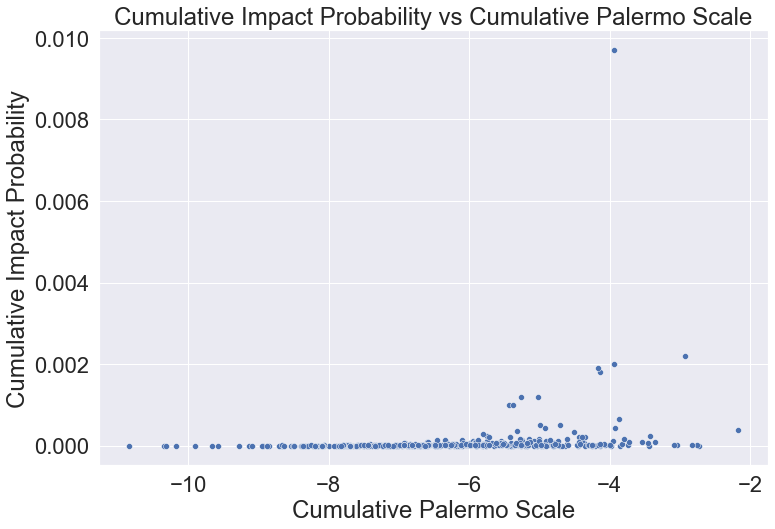

In [6]:
sns.set_theme(font_scale = 2)
plt.subplots(figsize=(12,8))
graph3 = sns.scatterplot(x = 'Cumulative Palermo Scale', y = 'Cumulative Impact Probability', data = df)
graph3.set(title= 'Cumulative Impact Probability vs Cumulative Palermo Scale')

### Observations
This scatterplot shows the relation between the Cumulative Palermo Scale and the Cumulative Impact Probability. Besides an outlier just below 0.010, most of the data ha a y-value in between 0.000 and 0.004. Towards the latter end of the plot, as the x-value increases, the y-value also slightly increases. Looking at this plot, I can conclude that there is a slight positive relation between the Cumulative Palermo Scale and the Cumulative Impact Probability

### Results
* Question 1 : What are the most common parameters that define an asteriod?
     - Asteriods come in all shapes and sizes. Asteriod Classification has been conducted over the years in NASA's research. In this milestone , we come to discover the most common paramters that define an asteriod. First is Asteriod Velocity in space. Asteriods vary in velocity but seem to have a steady state of velocity between 6 and 15 km/s. Second, Asteriod sizes vary across the board but are most popular between 25 and 30 m in magnitude. Lastly , this parameter varies less across different asteriods as most demonstrate a diamater of around 0.2 Km.

* Question 2 : What factors of our dataset affect the probability of an impact occurring?
    - There are a few factors of our dataset which affect the probability of an impact to occur. An important column in our dataset is the Cumulative Palermo Scale. This scale is important as it shows how serious an impact is, based on its energy at impact and the probability for one to occur. If you plot asteroids by diameter against the Cumulative Palermo Scale, it is shown that there is a positive relation between the two, meaning the larger the diameter of an asteroid results in a higher score on the scale. To further our understanding, if you plot asteroids by their score on the Cumulative Palermo Scale against their Cumulative Impact Probability, there is a slight positive relation between the two. This means that a higher score on the Cumulative Palermo Scale can lead to a slight increase in its Cumulative Impact Probability. Overall, factors like the diameter of an asteroid can affect the probability for an impact to occur.

## Conclusion
Overall , the impacts.csv dataset shows a broad range of parameters and probabilties that might seem initally complex to dissect but has been analyzed according to our understanding.Annually , NASA conducts numerous projects to gather more information on asteriod parameters and their potential impacts.In this project , we scrutinize the dataset and gain valuable information from conducting an exploratory data analysis that reveals relationships between certain paramaters.Morever,we visualize the most common characteristics that define an asteriod.We then gather the factors of an asteriod and commence an analysis to see how they affect the probabilties of impacts.